In [ ]:
# T19
# Practical Task

In [145]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [146]:
# Import iris dataset
iris = load_iris()
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Independent variables, y are
# SepalLength, SepalWidth, PetalLength, PetalWidth
# Dependent variable, x is Species

In [147]:
# Find missing values
missing_values_count = df.isnull().sum()
missing_values_count[0:]

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [148]:
# Replace Iris-virginica and Iris-vesicolor with 'Not-Iris-setosa
df['Species'] = df['Species'].replace(['Iris-virginica', 'Iris-versicolor'], 'Not-Iris-setosa')
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Not-Iris-setosa
146,147,6.3,2.5,5.0,1.9,Not-Iris-setosa
147,148,6.5,3.0,5.2,2.0,Not-Iris-setosa
148,149,6.2,3.4,5.4,2.3,Not-Iris-setosa


In [149]:
# Encoding
df['Species'] = LabelEncoder().fit_transform(df['Species'])
df.head(150)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [150]:
# Drop 'Id' column as this just represents a serial number for the rows and does not
# hold information about any features
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [151]:
df_feature = df.drop('Id', axis=1)
df_feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

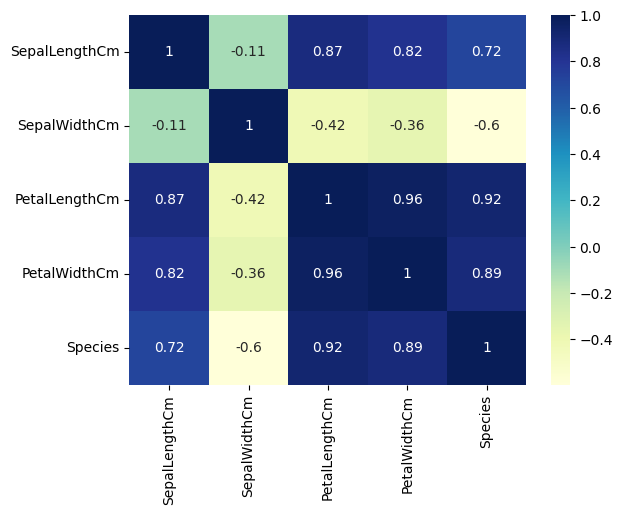

In [152]:
# Determine correlation between independent and target variable using a heat map
sns.heatmap(df_feature.corr(), annot=True, cmap='YlGnBu')

# This result shows that the sepallength, petallength and petalwidth are highly correlated to 
# the species that it turns out to be.
# Sepalwidth has a negative correlation  at -0.6 and so does not make a difference to any of the species.

In [153]:
# Index columns in the dataset
X = df_feature.iloc[:,[0,1,2,3]].values
y = df_feature.iloc[:,4].values

# Reshape data
X = X.reshape(-1,4)

# scale the data
X = preprocessing.scale(X)

X.shape

(150, 4)

In [154]:
# Split data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [155]:
# Create empty model and Fit a model to trainining data
df_reg = LogisticRegression()
df_reg.fit(X,y)

LogisticRegression()

In [156]:
# Make predictions on test data
y_pred = df_reg.predict(X_test).reshape(-1,1)

In [166]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion matrix:\n", confusion_matrix(y_pred, y_test))

Confusion matrix:
 [[10  0]
 [ 0 20]]


# The confusion matrix shows that the model's prediction of positive prediction of 10 is in line with the actual values and the negative prediction of 20 is also in line with the negative predictions of the actual values.
# There are no false negatives or false positives

# Based on the outcome of the confusion matrix, the model's predictions are 100% correct

In [163]:
# Print accuracy score

print("Accuracy score:", accuracy_score(y_pred, y_test))

Accuracy score: 1.0


In [167]:
# Print precision

print("Acuracy Score:", accuracy_score(y_pred, y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, y_test))
print("Classification Report:", classification_report(y_pred, y_test))

Acuracy Score: 1.0
Confusion Matrix: [[10  0]
 [ 0 20]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# The accuracy of the model's classification is 1 i.e 100%, and so is the precision and recall.
# The model is likely to have higher precision, where false positive is a concern.